# About Dataset

#Context

Movies' data is stored on several popular websites, but when it comes to critic reviews there is no better place than Rotten Tomatoes. This website allows to compare the ratings given by regular users (audience score) and the ratings given/reviews provided by critics (tomatometer) who are certified members of various writing guilds or film critic-associations.

#Content

In the movies dataset each record represents a movie available on Rotten Tomatoes, with the URL used for the scraping, movie tile, description, genres, duration, director, actors, users' ratings, and critics' ratings.
In the critics dataset each record represents a critic review published on Rotten Tomatoes, with the URL used for the scraping, critic name, review publication, date, score, and content.

Importing libraries and reading CSV files with pandas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from plotly.offline import init_notebook_mode,iplot
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

movies_df = pd.read_csv('rotten_tomatoes_movies.csv')
reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

In [2]:
movies_df.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [3]:
reviews_df.head(5)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


Histogram of Movies by year of release

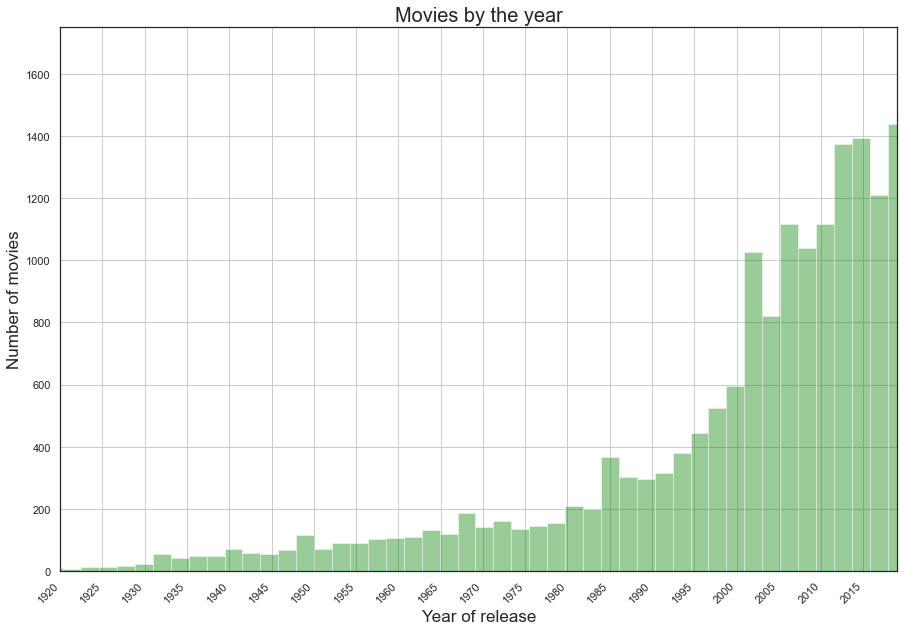

In [5]:
movies_df = movies_df[movies_df.original_release_date.notnull()]
movies_df['original_release_date'] = pd.to_datetime(movies_df['original_release_date'])
movies_df['movie_year'] = movies_df['original_release_date'].apply(lambda x: x.year)

sns.set(style="white")

plt.figure(figsize=(15,10))
plt.title('Movies by the year', size=20)
sns.distplot(movies_df.movie_year, kde=False,color='green')
plt.ylabel('Number of movies', size=17)
plt.xlabel('Year of release',size=17)
plt.axis([1920, 2019, 0, 1750])
plt.xticks(np.arange(1920, 2018, step=5),rotation=45, ha='right')
plt.grid()
plt.show()

Histogram of Reviews by year of posting

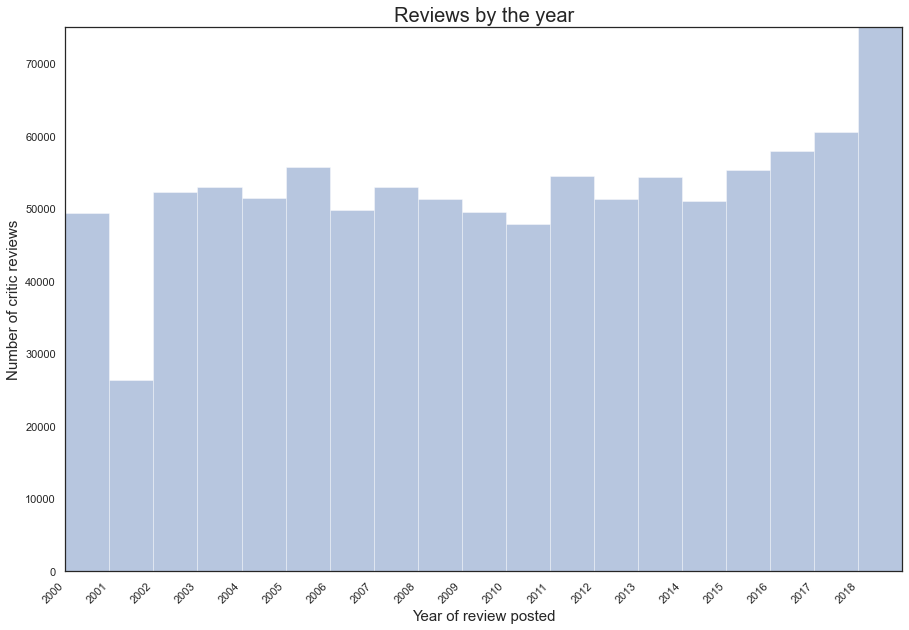

In [6]:
reviews_df = reviews_df[reviews_df.review_date.notnull()]
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])
reviews_df['review_year'] = reviews_df['review_date'].apply(lambda x: x.year)
reviews_df = reviews_df[reviews_df.review_year.astype(int) >= 2000]

plt.figure(figsize=(15,10))
plt.title('Reviews by the year', size=20)
sns.distplot(reviews_df.review_year, bins=20, kde=False)
plt.ylabel('Number of critic reviews', size=15)
plt.xlabel('Year of review posted',size=15)
plt.axis([2000, 2019, 0, 75000])
plt.xticks(np.arange(2000, 2019, step=1),rotation=45, ha='right')
plt.show()

Distribution of TomatoMeter ratings across the years

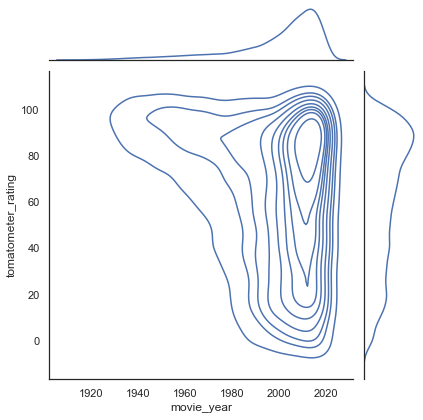

In [38]:
movies_df = movies_df[(movies_df.tomatometer_rating.notnull()) &
                      (movies_df.audience_rating.notnull())]
sns.jointplot(x=movies_df['movie_year'], y=movies_df['tomatometer_rating'],kind="kde")

Distribution of Audience ratings across the years

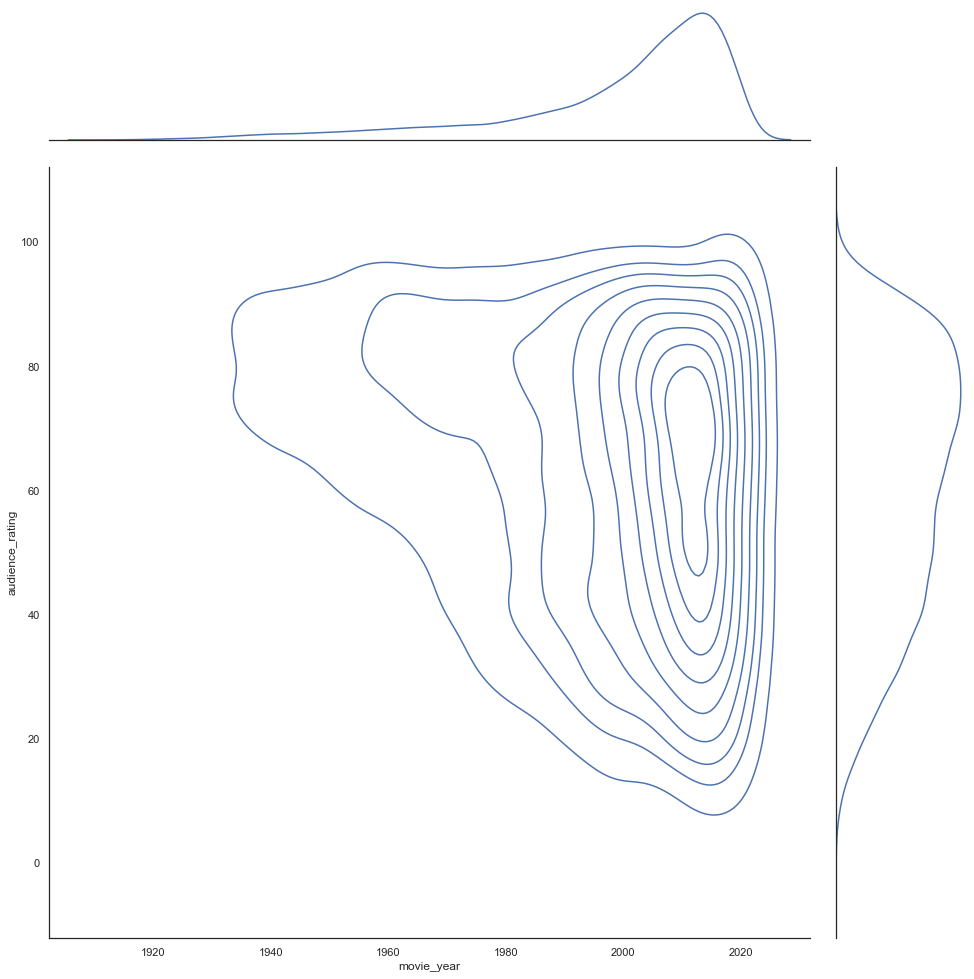

In [8]:
sns.jointplot(x=movies_df['movie_year'], y=movies_df['audience_rating'],
              kind="kde").fig.set_size_inches(15,15)

Frequency of Studio names

Text(0.5, 1.0, 'Distribution of Studio names')

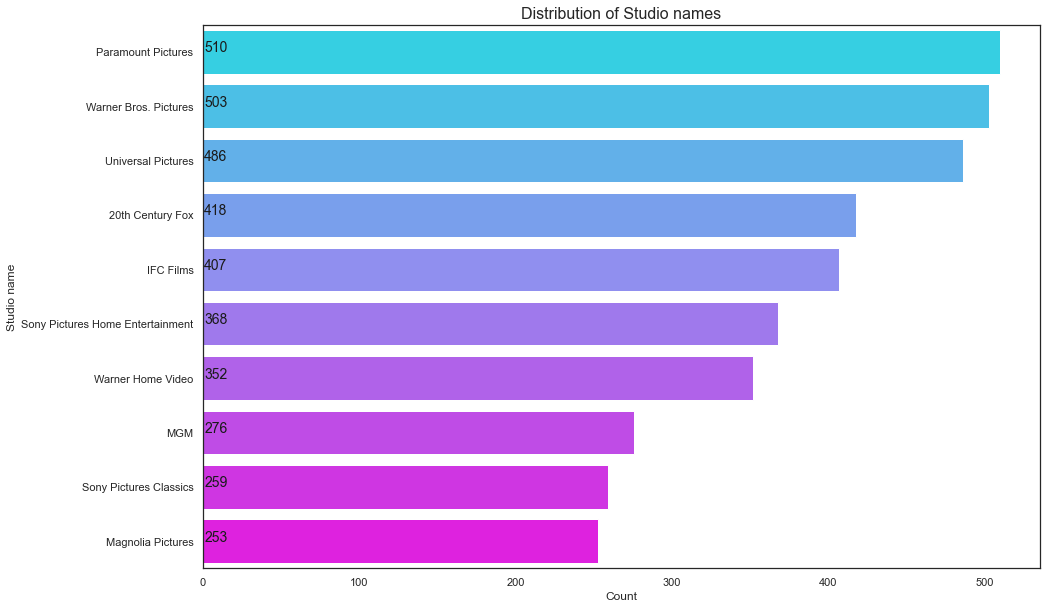

In [9]:
a = plt.cm.cool

plt.figure(figsize=(15,10))
count = movies_df['production_company'].value_counts()[:10]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Studio name', fontsize=12)
plt.title("Distribution of Studio names", fontsize=16)

Frequency of movie genres

Text(0.5, 1.0, 'Distribution of Genres')

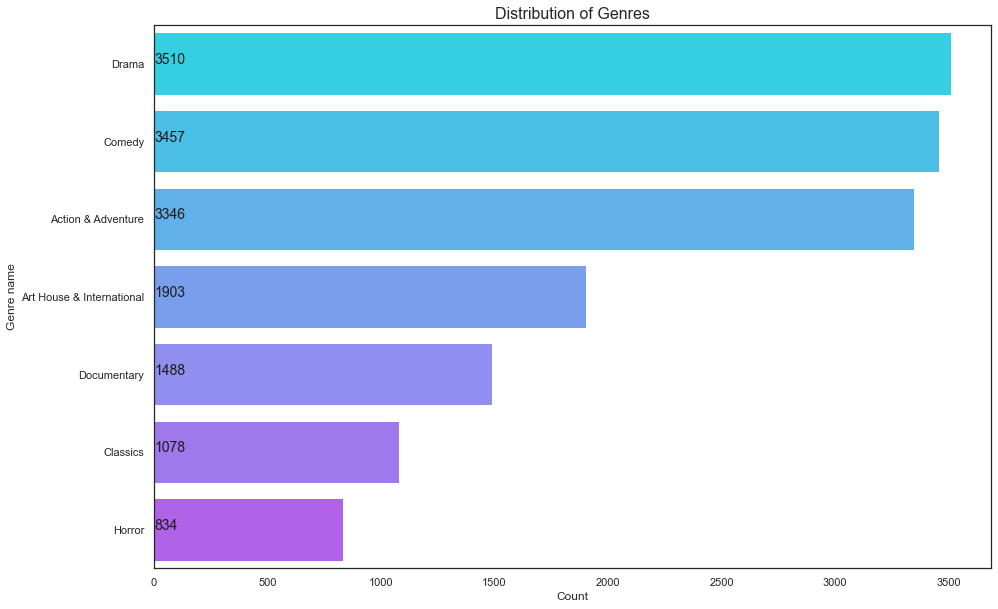

In [10]:
movies_df['first_genre'] = movies_df['genres'].str.split(',').str[0]

a = plt.cm.cool

plt.figure(figsize=(15,10))
count = movies_df['first_genre'].value_counts()[:7]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre name', fontsize=12)
plt.title("Distribution of Genres", fontsize=16)

Boxplot of TomatoMeter and Audience ratings grouped by genre

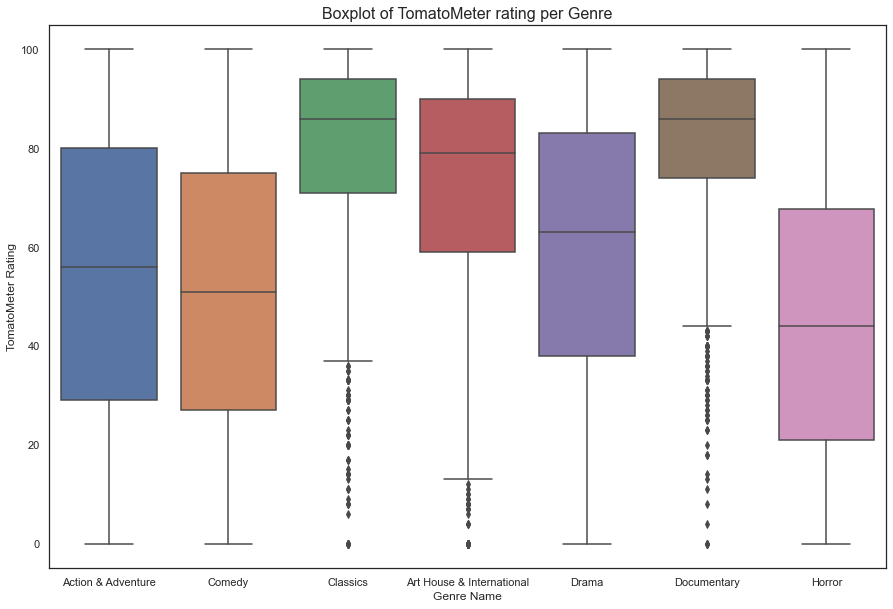

In [11]:
top_genres = list(count.index)
movie_genres_df = movies_df[movies_df['first_genre'].isin(top_genres)]
movie_genres_df = movie_genres_df[pd.notnull(movie_genres_df[['first_genre', 'tomatometer_rating', 'tomatometer_status', 'tomatometer_count',
                                                              'audience_rating', 'audience_status', 'audience_count']])]

plt.figure(figsize=(15, 10))
sns.boxplot(x='first_genre', y='tomatometer_rating', data=movie_genres_df)
plt.xlabel("Genre Name",fontsize=12)
plt.ylabel("TomatoMeter Rating",fontsize=12)
plt.title("Boxplot of TomatoMeter rating per Genre", fontsize=16)
plt.show()

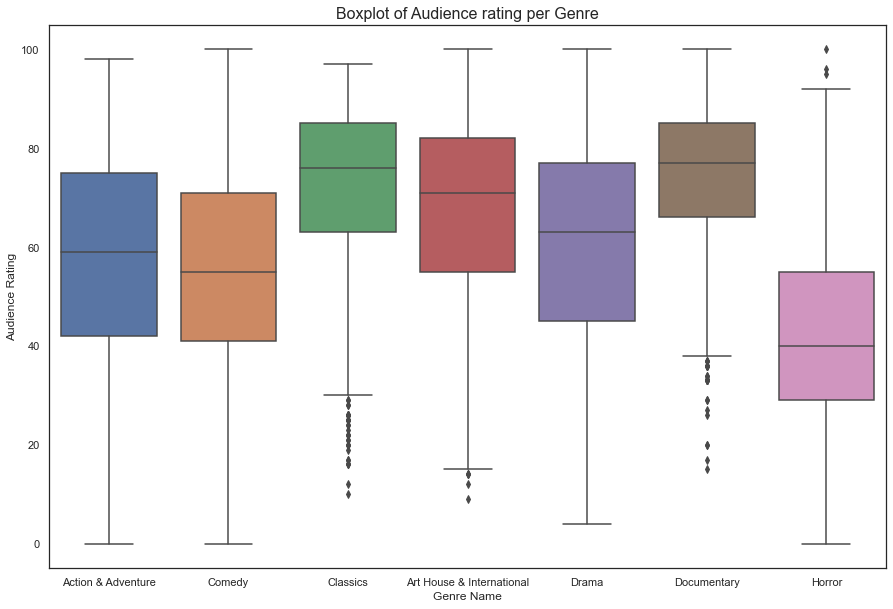

In [12]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='first_genre', y='audience_rating', data=movie_genres_df)
plt.xlabel("Genre Name",fontsize=12)
plt.ylabel("Audience Rating",fontsize=12)
plt.title("Boxplot of Audience rating per Genre", fontsize=16)
plt.show()

Crosstab of genres and TomatoMeter and Audience status

In [41]:
genre_rating_tomatometer = pd.crosstab(movie_genres_df.first_genre, movie_genres_df.tomatometer_status, margins=True)
genre_rating_tomatometer.style.background_gradient(cmap='coolwarm')

tomatometer_status,Certified-Fresh,Fresh,Rotten,All
first_genre,,,,
Action & Adventure,541,1034,1771,3346
Art House & International,474,947,482,1903
Classics,153,764,161,1078
Comedy,559,892,2006,3457
Documentary,401,920,167,1488
Drama,824,1094,1592,3510
Horror,76,206,552,834
All,3028,5857,6731,15616


In [14]:
genre_rating_audience = pd.crosstab(movie_genres_df.first_genre, movie_genres_df.audience_status, margins=True)
genre_rating_audience.style.background_gradient(cmap='summer_r')

audience_status,Spilled,Upright,All
first_genre,,,
Action & Adventure,1700,1596,3296
Art House & International,581,1320,1901
Classics,229,849,1078
Comedy,1965,1469,3434
Documentary,247,1233,1480
Drama,1554,1912,3466
Horror,669,148,817
All,6945,8527,15472


Factorplots of Genres and TomatoMeter and Audience status

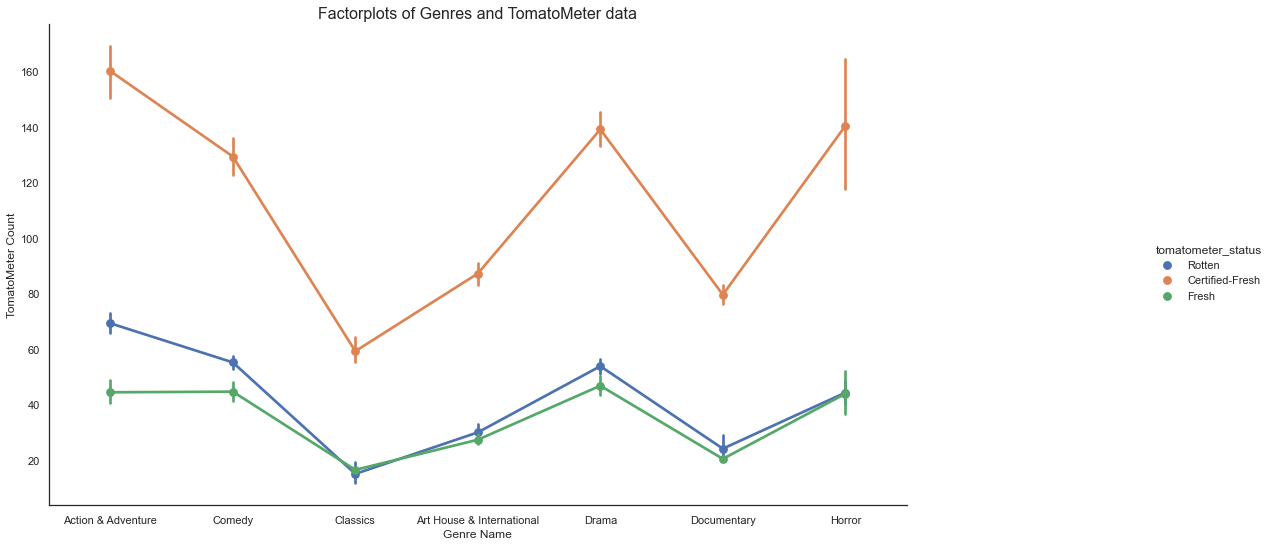

In [15]:
# avoiding the "factorplot" error message
import warnings
warnings.filterwarnings("ignore")

sns.factorplot('first_genre', 'tomatometer_count', hue='tomatometer_status', data=movie_genres_df)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.xlabel("Genre Name",fontsize=12)
plt.ylabel("TomatoMeter Count",fontsize=12)
plt.title("Factorplots of Genres and TomatoMeter data", fontsize=16)
plt.show()

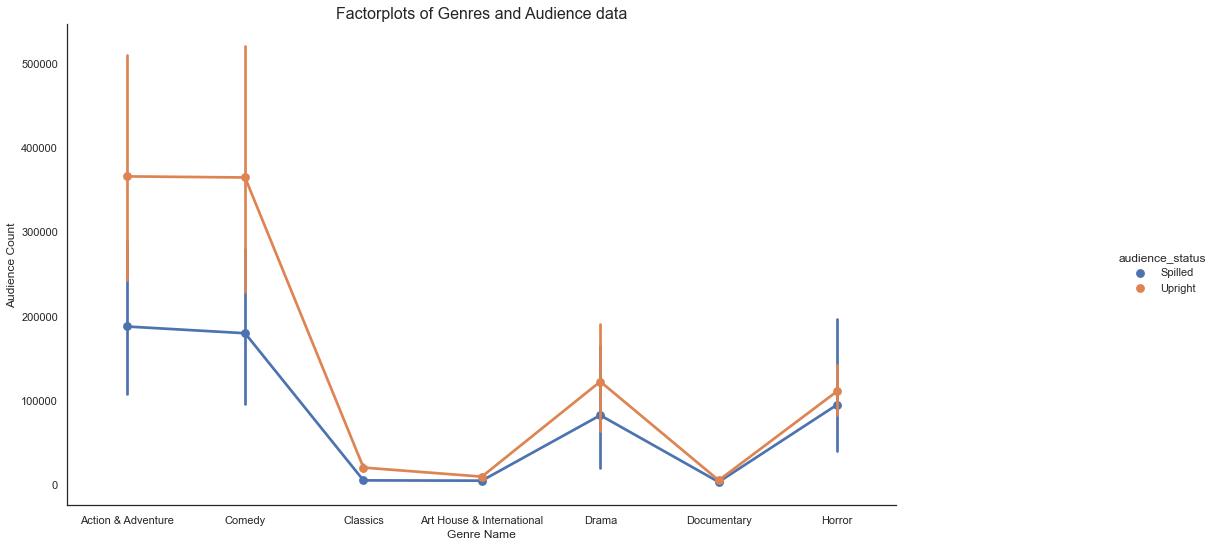

In [16]:
sns.factorplot('first_genre', 'audience_count', hue='audience_status', data=movie_genres_df)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.xlabel("Genre Name",fontsize=12)
plt.ylabel("Audience Count",fontsize=12)
plt.title("Factorplots of Genres and Audience data", fontsize=16)
plt.show()

Distribution of TomatoMeter count per TomatoMeter status

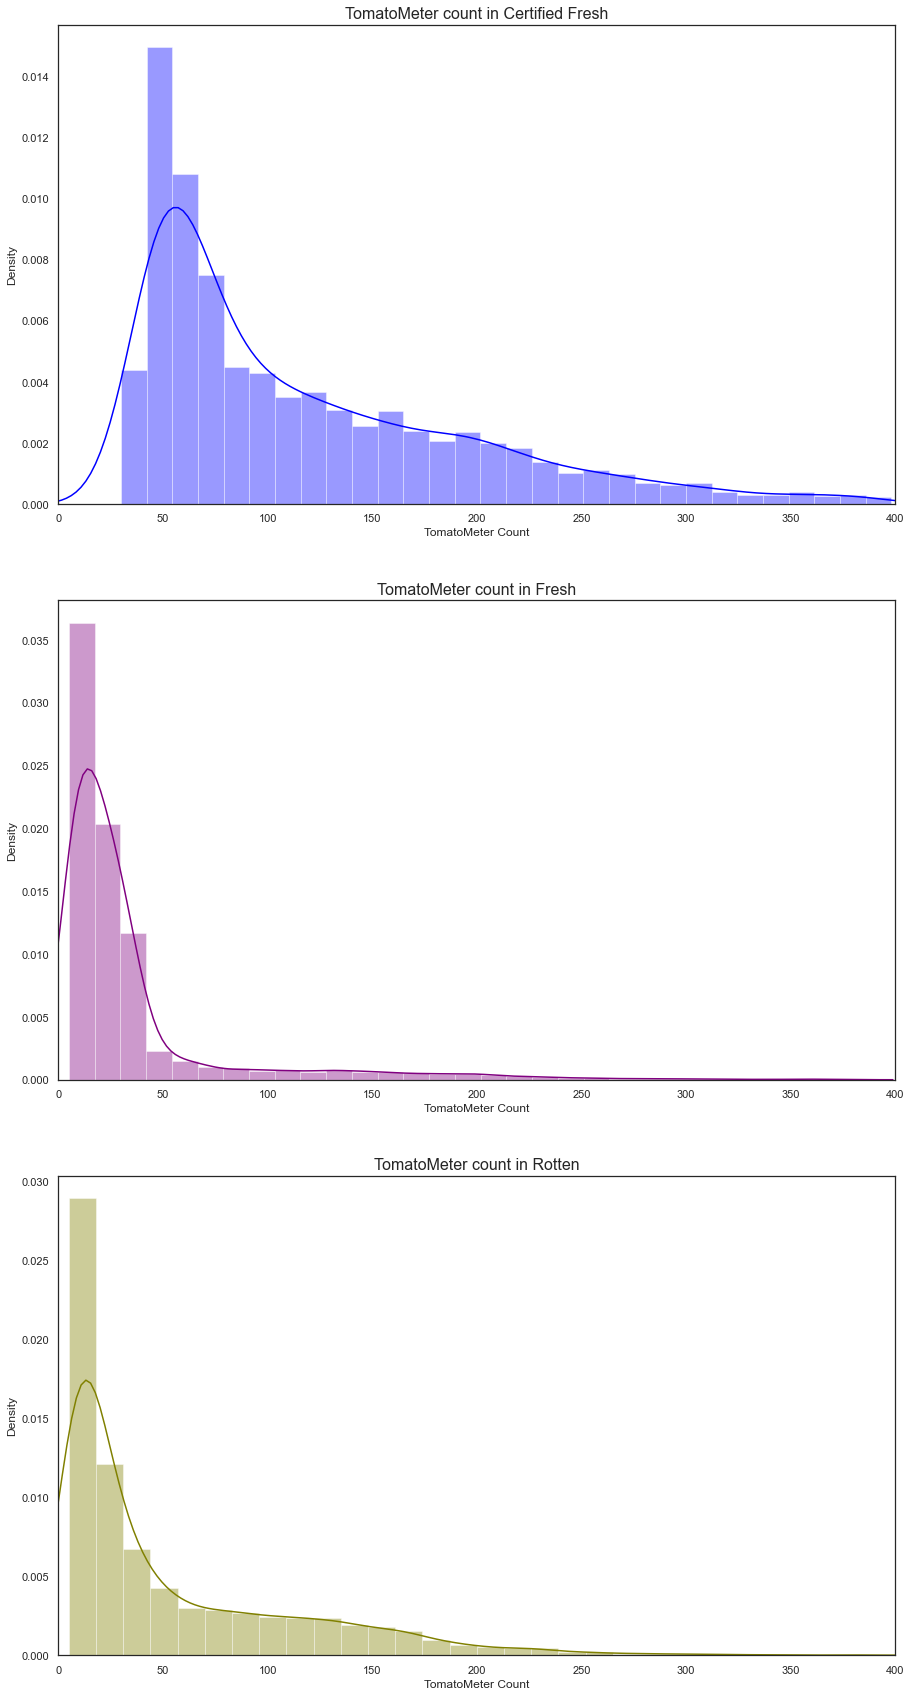

In [20]:
f,ax = plt.subplots(3,1, figsize=(15, 30))
sns.distplot(movie_genres_df[(movie_genres_df['tomatometer_status'] == 'Certified-Fresh') &
                             (movie_genres_df['tomatometer_count'] <= 400)].tomatometer_count, ax=ax[0], bins=30 ,color='blue')
ax[0].set_title('TomatoMeter count in Certified Fresh', fontsize=16)
ax[0].set_xlabel("TomatoMeter Count",fontsize=12)
ax[0].set_xlim([0,400])
sns.distplot(movie_genres_df[(movie_genres_df['tomatometer_status'] == 'Fresh') &
                             (movie_genres_df['tomatometer_count'] <= 400)].tomatometer_count, ax=ax[1], bins=30,color='purple')
ax[1].set_title('TomatoMeter count in Fresh', fontsize=16)
ax[1].set_xlabel("TomatoMeter Count",fontsize=12)
ax[1].set_xlim([0,400])
sns.distplot(movie_genres_df[(movie_genres_df['tomatometer_status'] == 'Rotten') &
                             (movie_genres_df['tomatometer_count'] <= 400)].tomatometer_count, ax=ax[2], bins=30,color='olive')
ax[2].set_title('TomatoMeter count in Rotten', fontsize=16)
ax[2].set_xlabel("TomatoMeter Count",fontsize=12)
ax[2].set_xlim([0,400])
plt.show()

Distribution of Audience count per Audience status

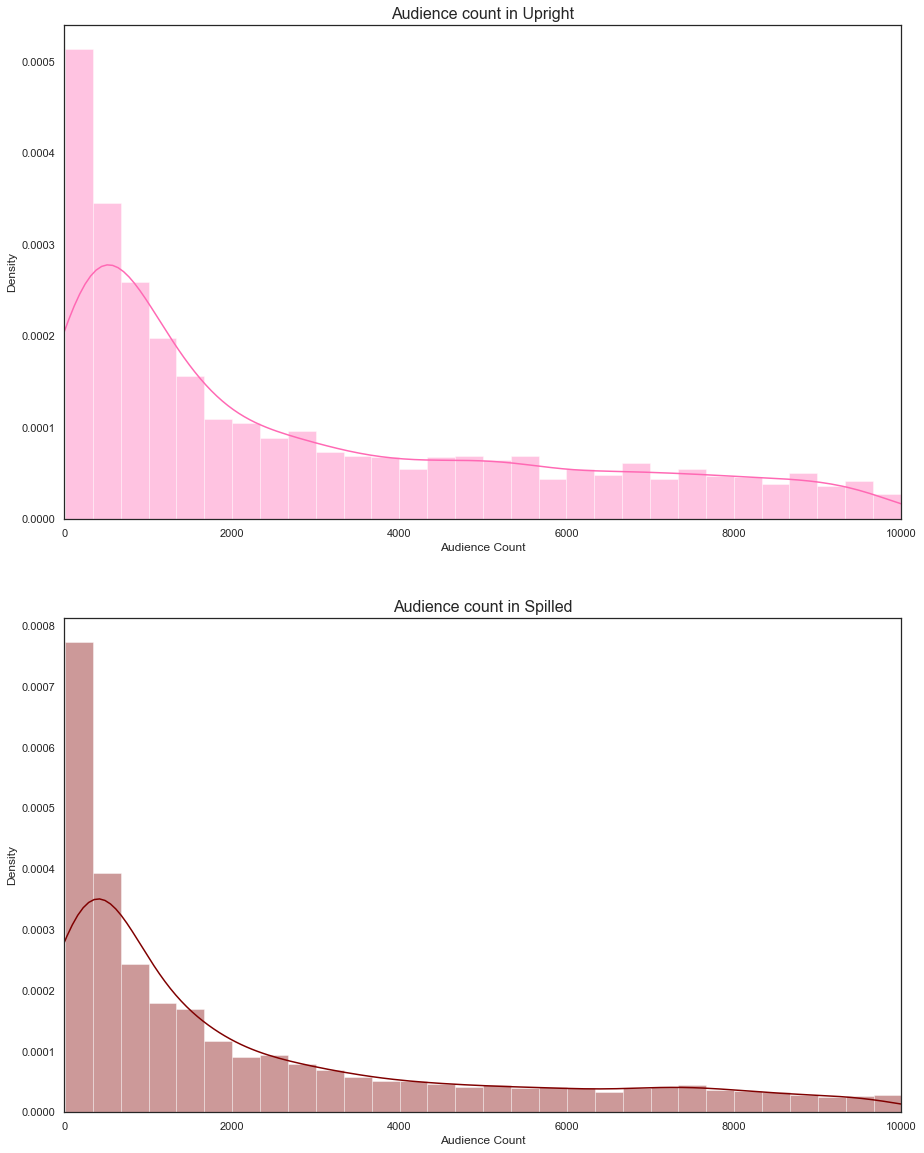

In [31]:
f,ax = plt.subplots(2,1, figsize=(15, 20))
sns.distplot(movie_genres_df[(movie_genres_df['audience_status'] == 'Upright') &
                             (movie_genres_df['audience_count'] <= 10000)].audience_count, ax=ax[0], bins=30,color='hotpink')
ax[0].set_title('Audience count in Upright', fontsize=16)
ax[0].set_xlabel("Audience Count",fontsize=12)
ax[0].set_xlim([0,10000])
sns.distplot(movie_genres_df[(movie_genres_df['audience_status'] == 'Spilled') &
                             (movie_genres_df['audience_count'] <= 10000)].audience_count, ax=ax[1], bins=30,color='maroon')
ax[1].set_title('Audience count in Spilled', fontsize=16)
ax[1].set_xlabel("Audience Count",fontsize=12)
ax[1].set_xlim([0,10000])
plt.show()

Pie chart of Genres and relative TomatoMeter status - credit to Marco Zanella for the code

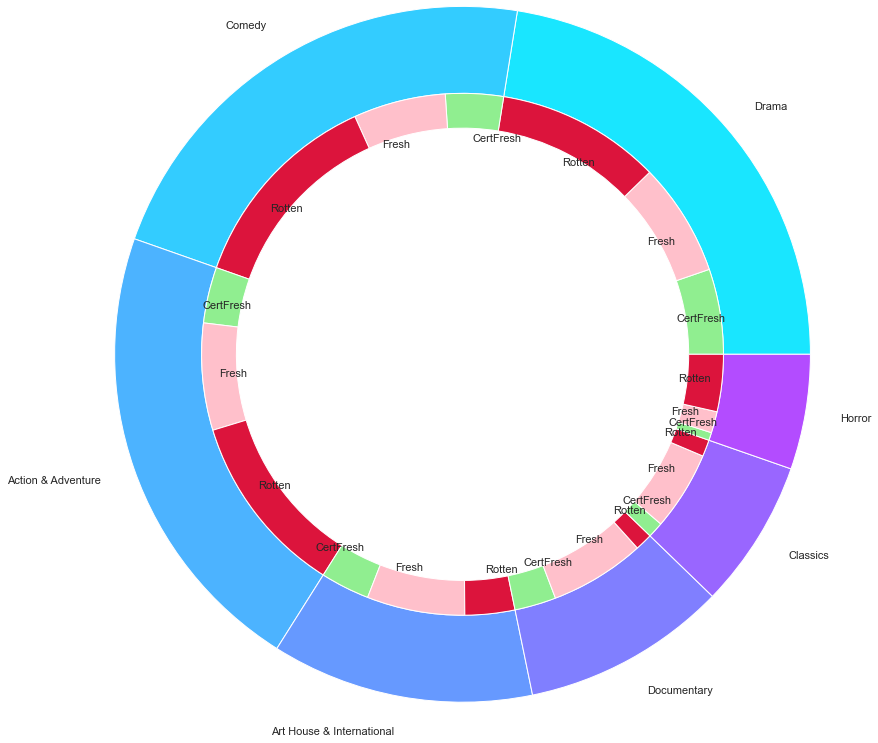

In [23]:
group_names = movie_genres_df.first_genre.value_counts().head(7).index
group_size = movie_genres_df.first_genre.value_counts().head(7)
subgroup_names = ['CertFresh','Fresh','Rotten', 'CertFresh','Fresh','Rotten', 'CertFresh','Fresh','Rotten', 'CertFresh', 'Fresh', 'Rotten',
                  'CertFresh','Fresh','Rotten', 'CertFresh','Fresh','Rotten', 'CertFresh','Fresh','Rotten']
size_list = []
for element in group_names:
    size_list.append(genre_rating_tomatometer.loc[element]['Certified-Fresh'])
    size_list.append(genre_rating_tomatometer.loc[element]['Fresh'])
    size_list.append(genre_rating_tomatometer.loc[element]['Rotten'])
subgroup_size = size_list

fig, ax = plt.subplots()
ax.axis('equal')
outter_pie, _ = ax.pie(group_size, radius=4, labels=group_names,
                       colors=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7)])
plt.setp(outter_pie, width=1, edgecolor='white') 
inner_pie, _ = ax.pie(subgroup_size, radius=3, labels=subgroup_names, labeldistance=0.83,
                      colors=['lightgreen','pink','crimson','lightgreen','pink','crimson', 'lightgreen','pink','crimson', 'lightgreen','pink','crimson','lightgreen','pink','crimson','lightgreen','pink','crimson','lightgreen','pink','crimson'])
plt.setp(inner_pie, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.show()

Pie chart of genres and relative Audience status - credit to Marco Zanella for the code

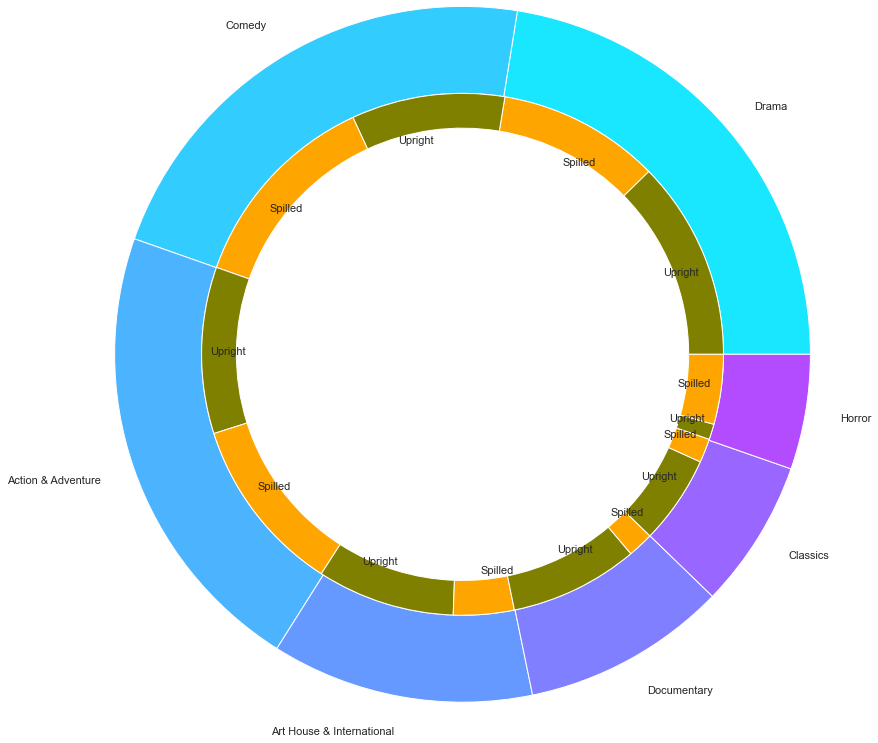

In [24]:
group_names = movie_genres_df.first_genre.value_counts().head(7).index
group_size = movie_genres_df.first_genre.value_counts().head(7)
subgroup_names = ['Upright','Spilled', 'Upright','Spilled', 'Upright','Spilled', 'Upright','Spilled',
                  'Upright','Spilled', 'Upright','Spilled', 'Upright','Spilled']
size_list = []
for element in group_names:
    size_list.append(genre_rating_audience.loc[element]['Upright'])
    size_list.append(genre_rating_audience.loc[element]['Spilled'])
subgroup_size = size_list

fig, ax = plt.subplots()
ax.axis('equal')
outter_pie, _ = ax.pie(group_size, radius=4, labels=group_names,
                       colors=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7)])
plt.setp(outter_pie, width=1, edgecolor='white') 
inner_pie, _ = ax.pie(subgroup_size, radius=3, labels=subgroup_names, labeldistance=0.83,
                      colors=['olive','orange','olive','orange','olive','orange','olive','orange','olive','orange','olive','orange','olive','orange'])
plt.setp(inner_pie, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.show()

Frequency of Publisher names in critic reviews

Text(0.5, 1.0, 'Distribution of Publisher names in critic reviews')

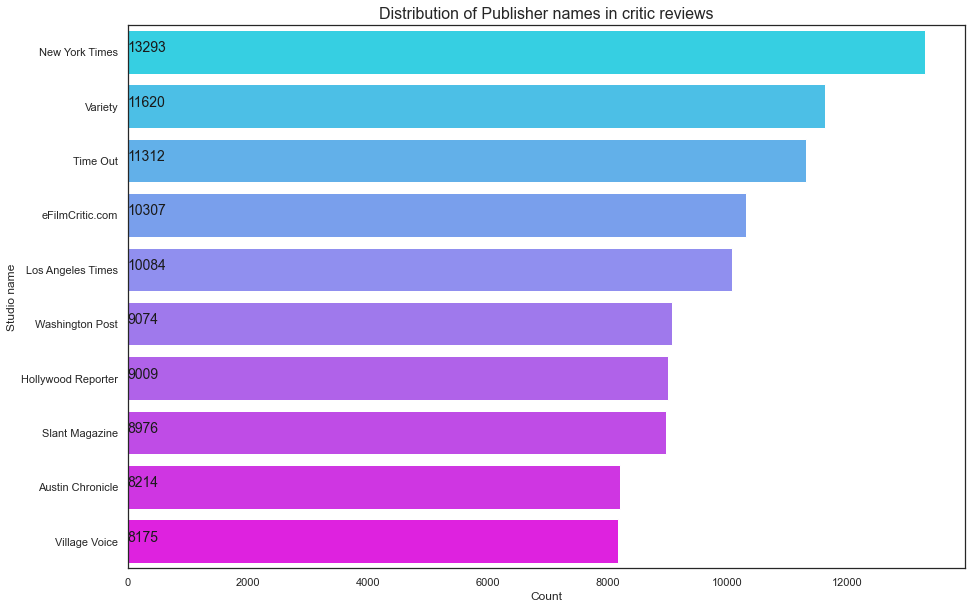

In [27]:
a = plt.cm.cool

plt.figure(figsize=(15,10))
count = reviews_df['publisher_name'].value_counts()[:10]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7),a(0.8),a(0.9),a(0.99)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Studio name', fontsize=12)
plt.title("Distribution of Publisher names in critic reviews", fontsize=16)

In [28]:
def cleaning_review_scores(x):
    x = re.sub(' +', '', x)
    if '/' in x: # rating is numeric, but need to transform it in score out of 10
        numer = float(x[:x.index('/')])
        denom = float(x[x.index('/')+1:])
        if (denom >= numer) and (denom > 0):
            return round(numer * (10 / denom), 2)
        else:
            return np.nan
    else: # rating is non-numeric
        if x == 'A':
            return 10
        elif x == 'A-':
            return 9.25
        elif x == 'B+':
            return 8.25
        elif x == 'B':
            return 7.5
        elif x == 'B-':
            return 6.75
        elif x == 'C+':
            return 5.75
        elif x == 'C':
            return 5
        elif x == 'C-':
            return 4.25
        elif x == 'D+':
            return 3.25
        elif x == 'D':
            return 2.5
        elif x == 'D-':
            return 1.75
        elif x == 'F':
            return 0

review_scores_df = reviews_df[(reviews_df.review_score.notnull()) & (reviews_df.review_score.str.isnumeric() == False)]
review_scores_df['review_score'] = review_scores_df['review_score'].apply(cleaning_review_scores)
review_scores_df['review_score'] = pd.to_numeric(review_scores_df['review_score'], errors='coerce')
review_scores_df = review_scores_df[(review_scores_df.review_score.notnull()) & (review_scores_df.review_content.notnull())]
review_scores_df['review_date'] = pd.to_datetime(review_scores_df['review_date'])
review_scores_df['review_year'] = review_scores_df['review_date'].apply(lambda x: x.year)
review_scores_df = review_scores_df[review_scores_df['review_year'] >= 2000]
review_scores_df.insert(1, 'first_genre', review_scores_df['rotten_tomatoes_link'].map(movies_df.set_index('rotten_tomatoes_link')['first_genre']))

Boxplot of Critic rating by year

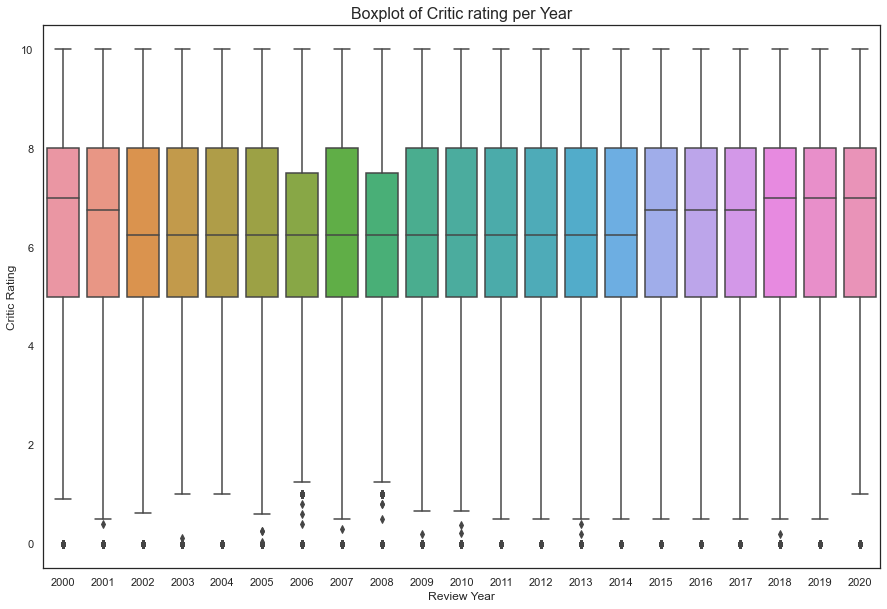

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='review_year', y='review_score', data=review_scores_df)
plt.xlabel("Review Year",fontsize=12)
plt.ylabel("Critic Rating",fontsize=12)
plt.title("Boxplot of Critic rating per Year", fontsize=16)
plt.show()

THANK YOU